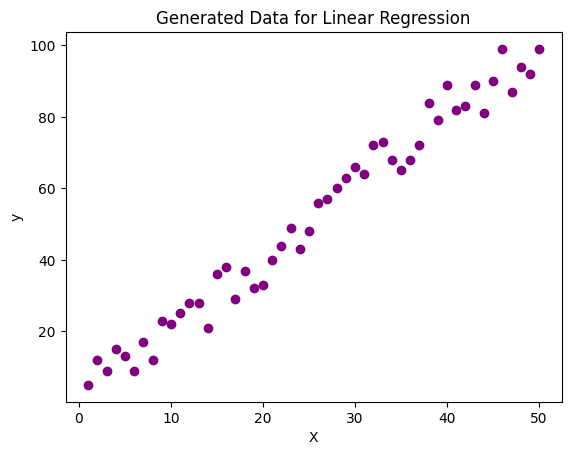

Name: VIGNESH R
Register No: 212222230172
Initial Weight: 0.10597813, Initial Bias: 0.96379614

Final epoch: 100  loss: 21.03359604 weight: 1.98277164 bias: 1.09101629


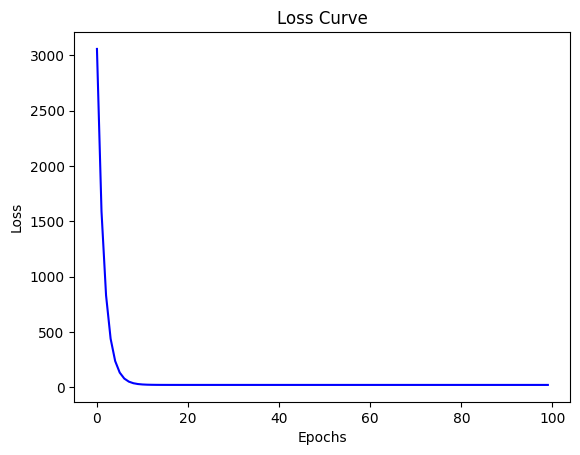


Name: VIGNESH R
Register No: 212222230172
Final Weight: 1.98277164, Final Bias: 1.09101629



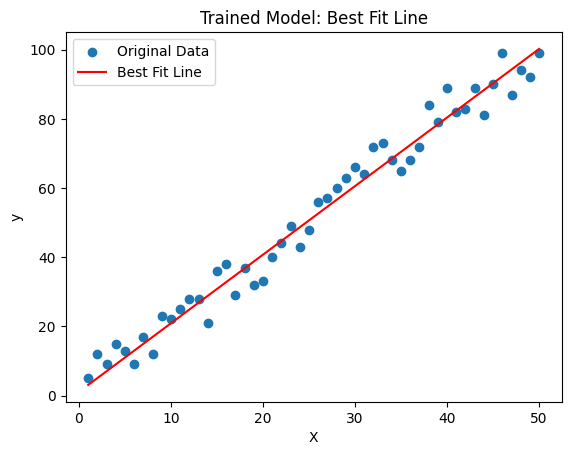


Name: VIGNESH R
Register No: 212222230172
Prediction for x = 120:  239.02362061


In [32]:
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt

# Set seed and generate data
t.manual_seed(71)
X = t.linspace(1, 50, 50).reshape(-1, 1)
e = t.randint(-8, 9, (50, 1), dtype=t.float)
y = 2 * X + 1 + e

# Plot the data
plt.scatter(X.numpy(), y.numpy(), color='purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

# Define the model
class Model(nn.Module):
    def __init__(self, in_features, out_features):  # Fixed __init__
        super().__init__()  # Fixed __init__
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

# Initialize model and print initial weights
t.manual_seed(59)
model = Model(1, 1)

initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()

print("Name: VIGNESH R")
print("Register No: 212222230172")
print(f"Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n")

# Define loss and optimizer
loss_function = nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(), lr=0.001)

# Training loop
epochs = 100
losses = []
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    # Uncomment this if you want to print for every epoch
    # print(f'epoch: {epoch:3}  loss: {loss.item():10.8f} '
    #       f'weight: {model.linear.weight.item():10.8f} '
    #       f'bias: {model.linear.bias.item():10.8f}')

# Final epoch info
print(f'Final epoch: {epoch:3}  loss: {loss.item():10.8f} '
      f'weight: {model.linear.weight.item():10.8f} '
      f'bias: {model.linear.bias.item():10.8f}')

# Plot loss curve
plt.plot(range(epochs), losses, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss Curve')
plt.show()

# Plot best fit line
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()

print("\nName: VIGNESH R")
print("Register No: 212222230172")
print(f'Final Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}\n')

x1 = t.tensor([X.min().item(), X.max().item()])
y1 = x1 * final_weight + final_bias

plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(x1.numpy(), y1.numpy(), 'r', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Trained Model: Best Fit Line')
plt.legend()
plt.show()

# Prediction for new data
x_new = t.tensor([[120.0]])
y_new_pred = model(x_new).item()
print("\nName: VIGNESH R")
print("Register No: 212222230172")
print(f"Prediction for x = 120:  {y_new_pred:.8f}")


In [33]:
torch.save(model.state_dict(), 'vignesh.pt')